# Katz centrality

In [64]:
#import libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from timeit import default_timer as timer
import math
import scipy.stats as stats
import pandas as pd
import sklearn
from sklearn import preprocessing

## Algorithm

In [120]:
def katz(G, max_num_of_steps, tolerance, alpha, beta):
    '''Computes the Katz centrality for the nodes of the graph G.'''
    start = timer()
    A = nx.adjacency_matrix(G)
    # first guess for vector r is first column of A
    r = A[:, 0]  
    diff = 1000
    k = 0
    vector = np.ones((A.shape[1], 1))
    while diff > tolerance and k < max_num_of_steps:
        # inner product of matrix A and vector r
        r, q = alpha*A.dot(r) + beta * vector, r
        diff = np.linalg.norm(q-r, ord=1)
        k += 1
    #normalized_r = preprocessing.normalize(r, axis=0, norm ='l1')
    print('process finished after {} iterations'.format(k))
    end = timer()
    # timing of the process
    print('time consumption: {} seconds'.format(end-start))
    return r

### Small example

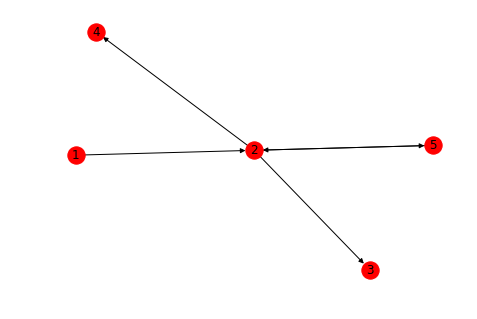

In [121]:
T = nx.DiGraph()   # or DiGraph, etc
T.add_edges_from(((1, 2), (2, 3), (2, 4), (2, 5), (5, 2)))
nx.draw(T, with_labels=True)
plt.show()

In [122]:
test = katz(T, 100, 0.1, 0.2, 1)
test

process finished after 4 iterations
time consumption: 0.0010353779998695245 seconds


matrix([[1.328],
        [1.664],
        [1.   ],
        [1.   ],
        [1.328]])

In [123]:
def rank(array):
    '''Returns vector with ranked values of array,
    where 0 is the minimum value of array'''
    temp = array.argsort(axis=0)
    ranks = temp.argsort(axis=0)
    return ranks

In [124]:
rank(test)

matrix([[2],
        [4],
        [0],
        [1],
        [3]], dtype=int64)

### Katz centrality on networks

In [125]:
#citation:@misc{snapnets,
#  author       = {Jure Leskovec and Andrej Krevl},
#  title        = {{SNAP Datasets}: {Stanford} Large Network Dataset Collection},
#  howpublished = {\url{http://snap.stanford.edu/data}},
#  month        = jun,
#  year         = 2014
#}
G_fb = nx.read_edgelist('facebook_combined.txt')

In [126]:
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


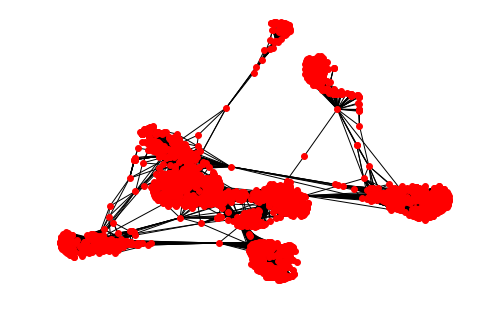

In [10]:
spring_pos = nx.spring_layout(G_fb)
nx.draw(G_fb, pos = spring_pos, node_size = 35)
plt.show()

Vemo, da je maksimalna lastna vrednost matrike sosednosti omejena z maksimalnim številom stopenj vseh vozlišč. V informacijah o grafu vidimo, da je povprečna stopnja vozlišča enaka 43.6910. Poskusimo z alfo manjšo od 1/43.6910 oziroma 0.0229.

In [127]:
r1 = katz(G_fb, 10000000, 0.01, 0.01, 1)
rank(r1)

process finished after 1454 iterations
time consumption: 1.5228195489999052 seconds


c:\users\tina\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in subtract
  del sys.path[0]


matrix([[3238],
        [1977],
        [1787],
        ...,
        [ 217],
        [ 232],
        [ 695]], dtype=int64)

In [129]:
r2 = katz(G_fb, 10000000, 0.01, 0.0061, 1)
rank(r2)

process finished after 1057 iterations
time consumption: 1.1888756090002062 seconds


matrix([[3404],
        [1125],
        [ 577],
        ...,
        [  17],
        [  91],
        [ 361]], dtype=int64)

Pri alpha = 0.0061 konvergira pri alpha = 0.0062 pa že divergira.

In [130]:
r3 = katz(G_fb, 10000000, 0.01, 0.003, 1)
rank(r3)

process finished after 16 iterations
time consumption: 0.19349783000052412 seconds


matrix([[3977],
        [1403],
        [ 807],
        ...,
        [  43],
        [ 175],
        [ 598]], dtype=int64)

In [131]:
r4 = katz(G_fb, 10000000, 0.01, 0.001, 1)
rank(r4)

process finished after 7 iterations
time consumption: 0.22587556300004508 seconds


matrix([[4034],
        [1488],
        [ 877],
        ...,
        [  68],
        [ 258],
        [ 750]], dtype=int64)

In [132]:
r5 = katz(G_fb, 10000000, 0.01, 0.0001, 1)
rank(r5)

process finished after 4 iterations
time consumption: 0.21555023200016876 seconds


matrix([[4034],
        [1496],
        [ 883],
        ...,
        [  79],
        [ 275],
        [ 769]], dtype=int64)

In [133]:
r6 = katz(G_fb, 10000000, 0.01, 0.000000001, 1)
rank(r6)

process finished after 2 iterations
time consumption: 0.17569843900037085 seconds


matrix([[4034],
        [1549],
        [ 953],
        ...,
        [  76],
        [ 340],
        [ 836]], dtype=int64)

In [134]:
r7 = katz(G_fb, 10000000, 0.01, 0.000000000000000001, 1)
rank(r7)

process finished after 2 iterations
time consumption: 0.22473266499946476 seconds


matrix([[4035],
        [3011],
        [3025],
        ...,
        [1281],
        [ 672],
        [1913]], dtype=int64)